<h1><center>Breast Cancer Wisconsin (Diagnostic) Data Set</center></h1>
<center> Eduardo Vargas Ferreira

# Atividade

O conjunto de dados contém medidas extraídas de imagens digitalizadas de biópsias de câncer de mama, com o objetivo de distinguir entre tumores benignos e malignos. 

Neste estudo, avaliamos o desempenho de três modelos de classificação: Regressão Logística (RL), Linear Discriminant Analysis (LDA) e Quadratic Discriminant Analysis (QDA), variando o threshold de decisão e analisando as métricas de Precisão, Recall e Acurácia. 

Além disso, utilizamos a curva ROC/AUC para comparar a capacidade discriminativa global dos modelos.

# Importação de pacotes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_curve, roc_auc_score

/home/eduardo/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Preparando os dados

In [2]:
df = pd.read_csv("cancer.csv")
df = df.drop(["Unnamed: 0", "Id"], axis=1)
df["Class"] = np.where(df["Class"] == "benign", 0, 1)

X = df.drop("Class", axis=1)
y = df["Class"]

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Escalonamento
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinando os modelos

In [3]:
modelos = {
    "Regressão Logística": LogisticRegression(max_iter=1000),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis()
}

# Treinamento
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)

# ================================
# Variando o threshold
# ================================
thresholds = np.linspace(0.2, 0.8, 50)
resultados = {}
melhor_por_threshold = []

for nome, modelo in modelos.items():
    probs = modelo.predict_proba(X_test)[:, 1]
    
    precisions, recalls, accuracies = [], [], []
    
    for t in thresholds:
        preds = (probs >= t).astype(int)
        precisions.append(precision_score(y_test, preds, zero_division=0))
        recalls.append(recall_score(y_test, preds, zero_division=0))
        accuracies.append(accuracy_score(y_test, preds))
    
    resultados[nome] = {
        "probs": probs,
        "precision": precisions,
        "recall": recalls,
        "accuracy": accuracies
    }


# Resultados

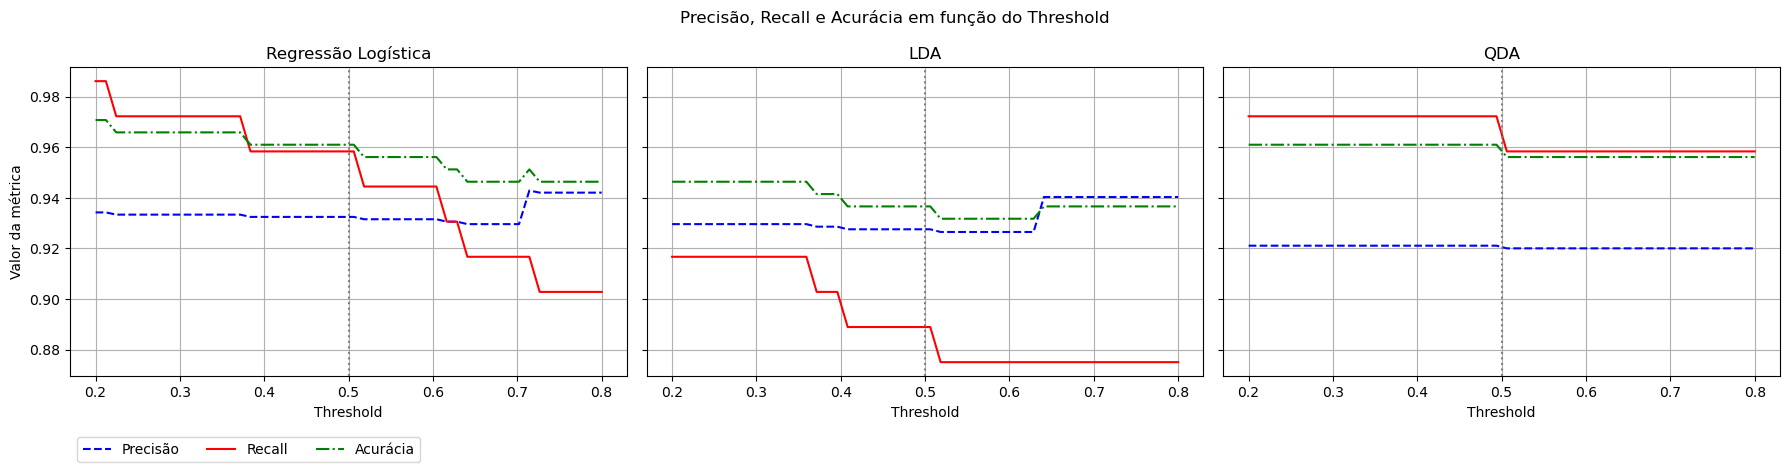

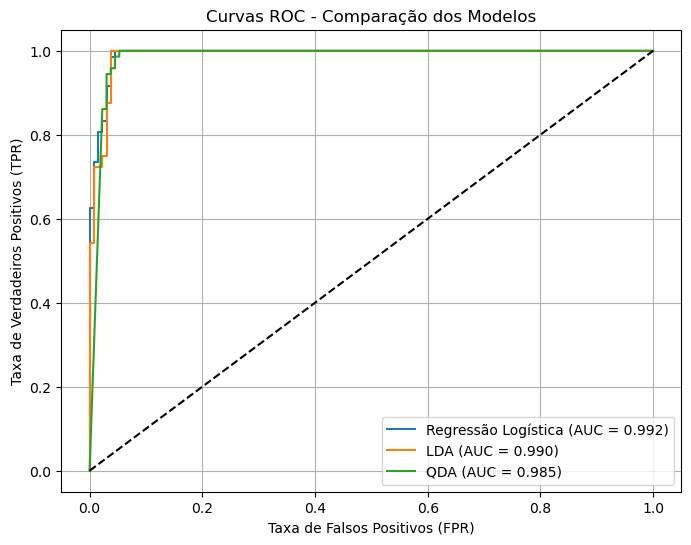

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, (nome, metricas) in zip(axes, resultados.items()):
    ax.plot(thresholds, metricas["precision"], label="Precisão", linestyle="--", color="blue")
    ax.plot(thresholds, metricas["recall"], label="Recall", linestyle="-", color="red")
    ax.plot(thresholds, metricas["accuracy"], label="Acurácia", linestyle="-.", color="green")
    ax.axvline(x=0.5, color="gray", linestyle=":")  # sem legenda
    
    ax.set_xlabel("Threshold")
    ax.set_title(nome)
    ax.grid(True)

axes[0].set_ylabel("Valor da métrica")
axes[0].legend(loc="lower left", bbox_to_anchor=(0, -0.3), ncol=3)

plt.suptitle("Precisão, Recall e Acurácia em função do Threshold")
plt.tight_layout()
plt.show()

# ================================
# Gráfico ROC/AUC comparando os modelos
# ================================
plt.figure(figsize=(8,6))

for nome, metricas in resultados.items():
    fpr, tpr, _ = roc_curve(y_test, metricas["probs"])
    auc = roc_auc_score(y_test, metricas["probs"])
    plt.plot(fpr, tpr, label=f"{nome} (AUC = {auc:.3f})")

plt.plot([0,1], [0,1], "k--")  # linha aleatória
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curvas ROC - Comparação dos Modelos")
plt.legend()
plt.grid(True)
plt.show()